# Soldering pen measurements

Initialization of iPython, some helper functions.

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def readCsvData(fileName):
    return np.genfromtxt(fileName, delimiter=';')

def plotData(data, timebase=1, xlabel="", ylabel="",names=[]):
    fig=plt.figure(figsize=[10,5])
    l = np.size(data,0)
    time = np.linspace(0,l-1,l)*timebase
    if np.ndim(data)>1: # If more than one vector to plot
        count = np.size(data,1)
        for i in range(count):
            plt.plot(time, data[:,i], label=names[i])
    else:
        plt.plot(time, data, label=names[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.plot()
    
def plotCsv(fileName, timebase=1, xlabel="", ylabel="",names=[]):
    data = readCsvData(fileName)
    plotData(data, timebase, xlabel, ylabel,names)

## ADC tests

Test description:
* ADC is synchronized from Timer1. Timer generates 100 us timebase.
* Heater PWM is generated by Timer14. PWM cycle length is 10 ms.
* PWM duty is set to ~73% before the measurements and to 0% after it.
* Soldering iron tip is preheated to 200..300*C

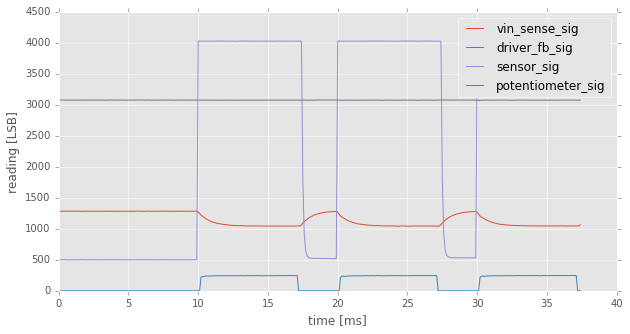

In [40]:
plotCsv('raw_data\\adc_test1.csv',0.1,"time [ms]", "reading [LSB]",
        ["vin_sense_sig","driver_fb_sig","sensor_sig","potentiometer_sig"])

## Magnetometer tests

### Slow PWM
Test description:
* Magnetometer is read continuously at max. rate: 80 Hz (12.5 ms).
* Heater PWM is generated by Timer14. PWM cycle length is 100 ms - 10x longer than planned finally.
* PWM duty is set to ~31% before the measurements and to 0% in the middle of it.
* At t~1 s permanent magnet (neodymium disc &phi;=5 mm, h=2 mm) is moved to ~20 mm from magnetometer.
* At t~4.3 s magnet is moved far from magnetometer.

Raw data plot:

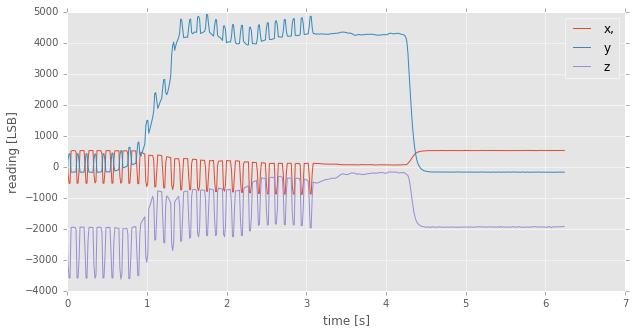

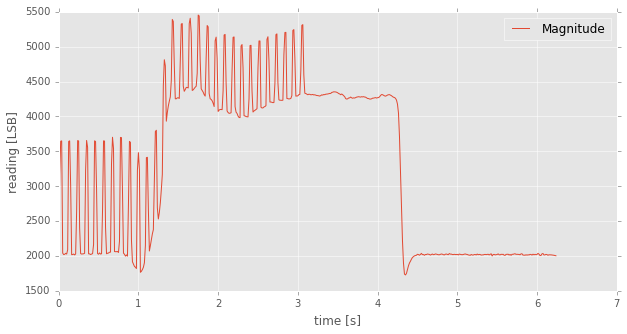

In [41]:
plotCsv('raw_data\\mag_test1.csv',1/80,"time [s]", "reading [LSB]",["x","y","z"])
data = readCsvData('raw_data\\mag_test1.csv')
mag=np.sqrt((data*data).sum(axis=1))
plotData(mag,1/80,"time [s]", "reading [LSB]",["Magnitude"])

### Normal PWM
Test description:
* Magnetometer is read continuously at max. rate: 80 Hz (12.5 ms).
* Heater PWM is generated by Timer14. PWM cycle length is 10 ms.
* PWM duty is set to ~31% before the measurements and to 0% in the middle of it.

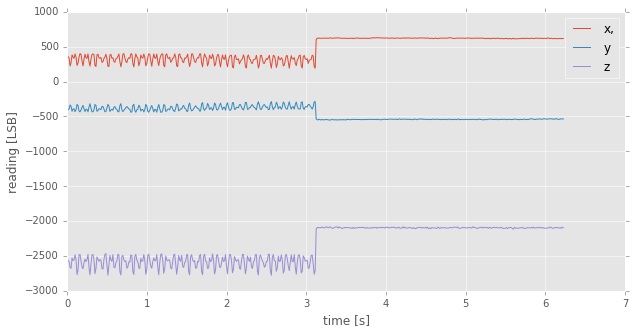

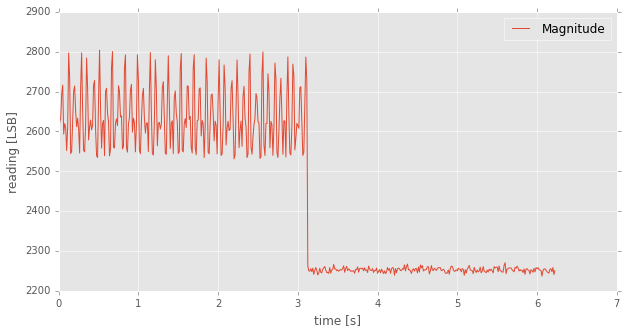

In [42]:
plotCsv('raw_data\\mag_test2.csv',1/80,"time [s]", "reading [LSB]",["x","y","z"])
data = readCsvData('raw_data\\mag_test2.csv')
mag=np.sqrt((data*data).sum(axis=1))
plotData(mag,1/80,"time [s]", "reading [LSB]",["Magnitude"])

## Test load
Test load built according to schematic below is used in most subsequent tests.

<tr><td style="border: none;"><img src="test_load_schematic.png"/></td><td style="width: 30%;border: none;"><img src="test_load_photo.jpg"/></td></tr>